In [1]:
import glob, cv2

In [2]:
files = glob.glob('imagedata\*.jpg')
test_feature=[]
test_label=[]

In [3]:
for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, img = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
    test_feature.append(img)
    label = file[10:11]
    test_label.append(int(label))

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline  
def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
    plt.gcf().set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(images[start_id], cmap='binary')
        
        if len(predictions) > 0:
            title = 'ai = ' + str(predictions[start_id])
            title += (' (o)' if predictions[start_id] == labels[start_id] else ' (x)')
            title += '\nlabel = ' + str(labels[start_id])
        else:
            title = 'label = ' + str(labels[start_id])
            
        ax.set_title(title, fontsize = 12)
        ax.set_xticks([])
        ax.set_yticks([])
        start_id += 1
    plt.show()

In [5]:
import numpy as np

In [6]:
test_feature = np.array(test_feature)
test_label = np.array(test_label)

In [7]:
test_feature_vector = test_feature.reshape(len(test_feature), 784).astype('float32')
test_feature_normalize = test_feature_vector/255

In [8]:
from keras.models import load_model
model = load_model('Mnist_mlp_model.h5')

Using TensorFlow backend.
C:\Users\Tatung\Anaconda3\envs\NeuralNetwork\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Tatung\Anaconda3\envs\NeuralNetwork\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Tatung\Anaconda3\envs\NeuralNetwork\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Tatung\Anac

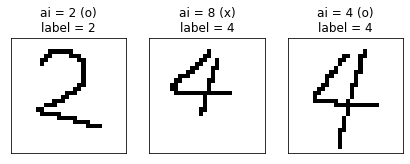

In [9]:
prediction = model.predict_classes(test_feature_normalize)
show_images_labels_predictions(test_feature, test_label, prediction, 0, num=3)